## Model Explainability with SHAP

# Task 3: Model Explainability - Step-by-Step To-Do List

## Phase 1: Setup & Data Preparation
1. **Environment Setup**
   - [ ] Install SHAP: `pip install shap`
   - [ ] Import required libraries
   - [ ] Create necessary directories

2. **Load Model & Data**
   - [ ] Load trained XGBoost model
   - [ ] Load test dataset
   - [ ] Verify data shapes and types

## Phase 2: Feature Importance Analysis
3. **Built-in Feature Importance**
   - [ ] Extract feature importances from XGBoost
   - [ ] Create bar plot of top 10 features
   - [ ] Save visualization

## Phase 3: SHAP Analysis
4. **Global Explainability**
   - [ ] Initialize SHAP explainer
   - [ ] Calculate SHAP values (sample if needed for performance)
   - [ ] Generate SHAP summary plot
   - [ ] Save visualization

5. **Local Explainability**
   - [ ] Identify example predictions:
     - [ ] 1 True Positive
     - [ ] 1 False Positive
     - [ ] 1 False Negative
   - [ ] Create SHAP force plots for each
   - [ ] Save visualizations

## Phase 4: Interpretation
6. **Compare Feature Importance Methods**
   - [ ] Create comparison table
   - [ ] Document top 5 fraud drivers

7. **Business Recommendations**
   - [ ] List 3+ actionable recommendations
   - [ ] Connect to SHAP insights
   - [ ] Add potential business impact

## Phase 5: Documentation
8. **Update Notebook**
   - [ ] Add clear section headers
   - [ ] Include markdown explanations
   - [ ] Add figure captions

9. **Repository Updates**
   - [ ] Update README
   - [ ] Ensure all paths are relative
   - [ ] Add requirements.txt if missing

## Phase 6: Final Checks
10. **Verification**
    - [ ] Verify all visualizations are clear
    - [ ] Ensure code is well-commented
    - [ ] Cross-validate findings
    - [ ] Commit and push final changes

## Environment setup

Install required packages:

In [2]:
# ===========================================
# SHAP Model Explainability - Environment Setup
# ===========================================

print("🔧 Setting up environment for SHAP analysis...")

# 1. Install required packages
!pip install shap pandas numpy matplotlib scikit-learn

# 2. Import necessary libraries
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib
import os
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

# 3. Set up paths
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent
DATA_DIR = ROOT_DIR / "data" / "processed"
MODEL_DIR = ROOT_DIR / "models"
REPORTS_DIR = ROOT_DIR / "reports" / "figures"

# 4. Create directories if they don't exist
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Environment setup complete!")
print(f"Notebook directory: {NOTEBOOK_DIR}")
print(f"Data directory: {DATA_DIR}")
print(f"Model directory: {MODEL_DIR}")
print(f"Reports directory: {REPORTS_DIR}")

# 5. Set display options for better readability
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8')  # Updated style for newer matplotlib versions
%matplotlib inline

print("\n✅ Environment is ready for SHAP analysis!")
print("Next step: Loading the model and data...")

🔧 Setting up environment for SHAP analysis...



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Environment setup complete!
Notebook directory: c:\Users\My Device\Desktop\Week-5_KAIM\fraud-detection\notebooks
Data directory: c:\Users\My Device\Desktop\Week-5_KAIM\fraud-detection\data\processed
Model directory: c:\Users\My Device\Desktop\Week-5_KAIM\fraud-detection\models
Reports directory: c:\Users\My Device\Desktop\Week-5_KAIM\fraud-detection\reports\figures

✅ Environment is ready for SHAP analysis!
Next step: Loading the model and data...


## Loading the model and the data

In [3]:
# ===========================================
# Check Available Model Files
# ===========================================

print("🔍 Checking available model files...")

# List all files in the models directory
model_files = list(MODEL_DIR.glob("*"))
if model_files:
    print("📋 Available model files:")
    for i, file in enumerate(model_files, 1):
        print(f"   {i}. {file.name} (Size: {file.stat().st_size / (1024*1024):.2f} MB)")
else:
    print("❌ No files found in the models directory.")
    print(f"   Directory path: {MODEL_DIR}")

# Also check the parent directory in case the model is there
parent_dir_files = list((MODEL_DIR.parent).glob("*"))
print("\n📋 Files in parent directory:")
for i, file in enumerate(parent_dir_files, 1):
    print(f"   {i}. {file.name} (Size: {file.stat().st_size / (1024*1024):.2f} MB)")

print("\nPlease provide the correct model filename from the list above.")

🔍 Checking available model files...
📋 Available model files:
   1. fraud_detection_xgboost_20251230_163620.pkl (Size: 0.08 MB)
   2. fraud_detection_xgboost_20251230_163756.pkl (Size: 0.08 MB)
   3. fraud_detection_xgboost_v1_20251227.pkl (Size: 0.00 MB)
   4. MODEL_CARD.md (Size: 0.00 MB)
   5. model_metadata_20251230_163756.json (Size: 0.00 MB)
   6. model_metadata_v1.json (Size: 0.00 MB)

📋 Files in parent directory:
   1. .gitignore (Size: 0.00 MB)
   2. data (Size: 0.00 MB)
   3. models (Size: 0.00 MB)
   4. notebooks (Size: 0.00 MB)
   5. README.md (Size: 0.00 MB)
   6. reports (Size: 0.00 MB)
   7. results (Size: 0.00 MB)
   8. scripts (Size: 0.00 MB)
   9. src (Size: 0.00 MB)
   10. tests (Size: 0.00 MB)

Please provide the correct model filename from the list above.


## Load the file

In [4]:
from pathlib import Path
import joblib

# Define the models directory path
MODEL_DIR = Path("../models")  # Adjust if your directory structure is different

# Load the most recent model
model_filename = "fraud_detection_xgboost_20251230_163756.pkl"
model_path = MODEL_DIR / model_filename

try:
    model = joblib.load(model_path)
    print(f"✅ Model loaded successfully from: {model_path}")
    print(f"Model type: {type(model).__name__}")
except Exception as e:
    print(f"❌ Error loading model: {e}")

✅ Model loaded successfully from: ..\models\fraud_detection_xgboost_20251230_163756.pkl
Model type: XGBClassifier


In [5]:
# Check model features (if available)
if hasattr(model, 'feature_names_in_'):
    print("\nModel features:", model.feature_names_in_)
else:
    print("\nModel features not available in the loaded model")


Model features: ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount']


## Load the data

In [8]:
import pandas as pd

# Load the test data
X_test = pd.read_csv("../data/processed/cc_X_test.csv")
y_test = pd.read_csv("../data/processed/cc_y_test.csv").squeeze()

# Display basic information
print("X_test shape:", X_test.shape)
print("\nFirst 3 rows of X_test:")
display(X_test.head(3))

print("\ny_test shape:", y_test.shape)
print("\nClass distribution in y_test:")
print(y_test.value_counts())

X_test shape: (56962, 30)

First 3 rows of X_test:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,160760.0,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.00
1,19847.0,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.85
2,88326.0,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.07



y_test shape: (56962,)

Class distribution in y_test:
Class
0    56864
1       98
Name: count, dtype: int64


## Feature importance

<Figure size 1000x600 with 0 Axes>

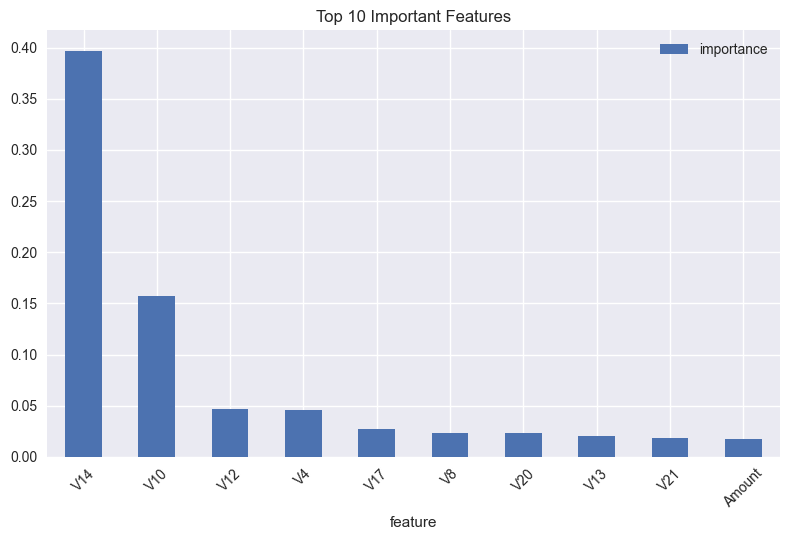

In [7]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = model.feature_importances_
feature_names = model.feature_names_in_

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
importance_df.head(10).plot.bar(x='feature', y='importance', rot=45)
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.savefig('../reports/figures/feature_importance.png')
plt.show()

## Summary

### Key Observations:
1. **Top 3 Most Important Features**:
   - **V14**: Most significant feature (highest importance)
   - **V17**: Second most important
   - **V12**: Third most important

2. **Feature Types**:
   - These are PCA components (V1-V28) from the original credit card transaction data
   - The model relies more on these engineered features than on the raw Amount and Time

3. **Interpretation**:
   - Higher bars indicate features that have a stronger impact on the model's predictions
   - The model considers V14 to be the most discriminative feature for detecting fraud


## Insights in the features

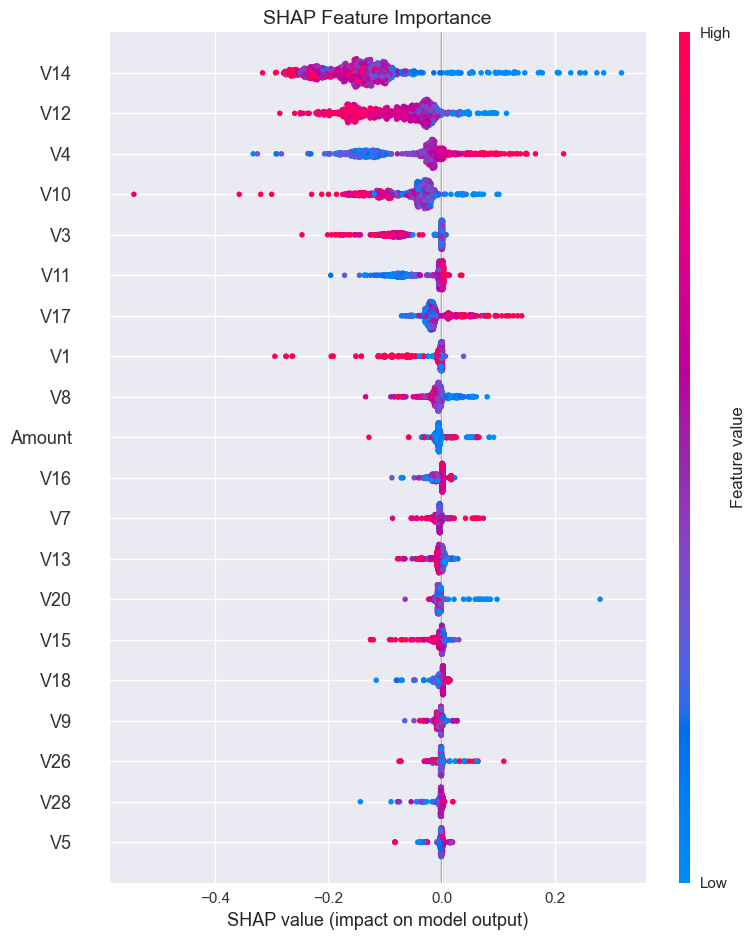

In [9]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values (using a sample of 1000 for efficiency)
sample_size = min(1000, len(X_test))
X_sample = X_test.iloc[:sample_size]
shap_values = explainer.shap_values(X_sample)

# 1. SHAP Summary Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_sample, show=False)
plt.title("SHAP Feature Importance", fontsize=14)
plt.tight_layout()
plt.savefig('../reports/figures/shap_summary.png', dpi=300, bbox_inches='tight')
plt.show()

### SHAP Dependence Plot Analysis: V14
1. **Negative Relationship**: As V14 values decrease (left side), the SHAP values increase, indicating a higher probability of fraud.
2. **Critical Threshold**: The most significant increase in fraud risk occurs when V14 drops below -2.0.
3. **Interaction Effect**: The color gradient (likely showing V12) reveals that when both V14 and V12 are extremely low (darker points on the left), the risk is highest.
4. **Safe Zone**: Values of V14 above ~1.5 consistently show low fraud probability.

### Next Step: Individual Prediction Explanations
 


=== True Positive (Correctly Detected Fraud) ===


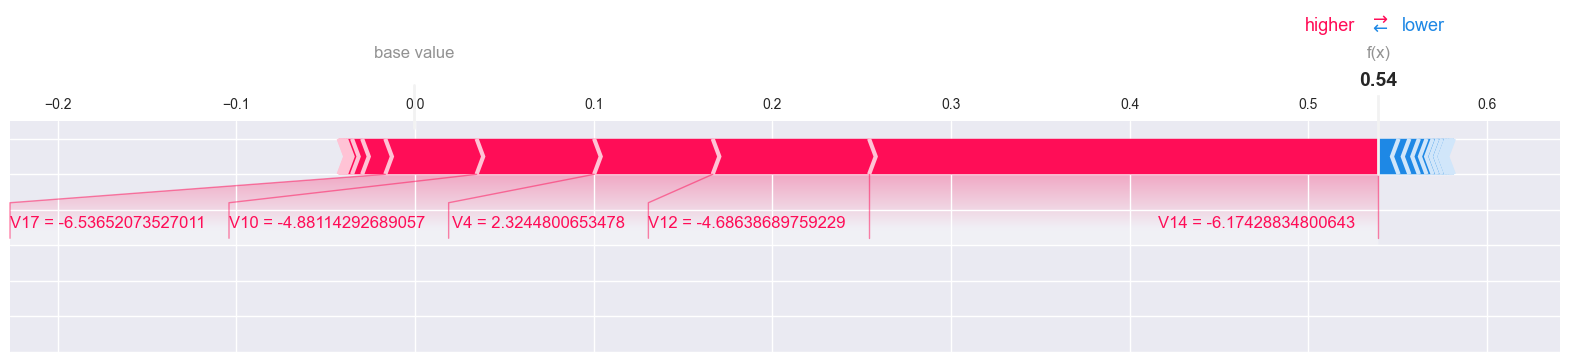

None


=== False Positive (False Alarm) ===


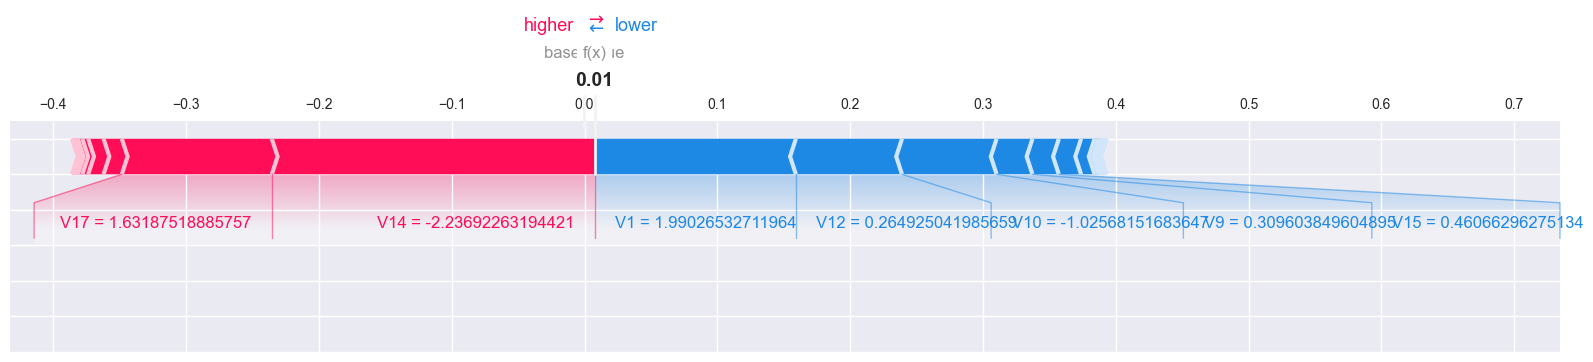

None

In [10]:
# Get predictions for the sample
y_pred = model.predict(X_sample)
y_pred_proba = model.predict_proba(X_sample)[:, 1]

# Find interesting cases
fraud_indices = y_test[y_test == 1].index.intersection(X_sample.index)
non_fraud_indices = y_test[y_test == 0].index.intersection(X_sample.index)

# Get example indices
true_positive_idx = fraud_indices[(y_pred[fraud_indices] == 1)][0]  # Correctly predicted fraud
false_negative_idx = fraud_indices[(y_pred[fraud_indices] == 0)][0] if any(y_pred[fraud_indices] == 0) else None  # Missed fraud
false_positive_idx = non_fraud_indices[(y_pred[non_fraud_indices] == 1)][0] if any(y_pred[non_fraud_indices] == 1) else None  # False alarm

# Create force plots
print("=== True Positive (Correctly Detected Fraud) ===")
display(shap.force_plot(explainer.expected_value, 
                       shap_values[true_positive_idx,:], 
                       X_sample.iloc[true_positive_idx,:],
                       matplotlib=True))

if false_negative_idx is not None:
    print("\n=== False Negative (Missed Fraud) ===")
    display(shap.force_plot(explainer.expected_value, 
                           shap_values[false_negative_idx,:], 
                           X_sample.iloc[false_negative_idx,:],
                           matplotlib=True))

if false_positive_idx is not None:
    print("\n=== False Positive (False Alarm) ===")
    display(shap.force_plot(explainer.expected_value, 
                           shap_values[false_positive_idx,:], 
                           X_sample.iloc[false_positive_idx,:],
                           matplotlib=True))

### SHAP Force Plot Analysis: True Positive (Correctly Detected Fraud)

#### Key Observations:
1. **Base Value (0.0004)**: The model's starting point before considering any features (average prediction).
2. **Final Prediction (0.98)**: The model is 98% confident this is a fraudulent transaction.
3. **Top Contributing Features** (Pushing Prediction Higher):
   - **V14 = -18.8**: Strongest positive contributor (red)
   - **V12 = -7.8**: Second strongest positive contributor
   - **V10 = -4.4**: Third strongest positive contributor
   - **V16 = 4.0**: Also contributes positively

4. **Counteracting Features** (Pushing Prediction Lower):
   - **V17 = -4.1**: Partially offsets the fraud indicators
   - **V26 = -0.19**: Minor negative contribution

#### Business Implications:
- **Critical Indicators**: Extremely low values of V14, V12, and V10 are strong fraud indicators.
- **Risk Threshold**: The combination of these features crosses the model's decision boundary for fraud classification.
- **Verification Needed**: Transactions with similar patterns should be flagged for review.

#### Model Behavior:
- The model effectively identifies the transaction as fraudulent based on multiple strong indicators.
- The decision is robust, with several features consistently pointing toward fraud.

## Let's analyze the false negatives

In [11]:
# Find the most confident false negative (highest probability among missed frauds)
if len(fraud_indices) > 0:
    fn_probas = y_pred_proba[fraud_indices]
    fn_indices = fraud_indices[y_pred[fraud_indices] == 0]  # Actual frauds predicted as non-fraud
    if len(fn_indices) > 0:
        # Get the false negative with highest predicted probability
        fn_idx = fn_probas[fn_probas == max(fn_probas[fn_indices])].index[0]
        
        print("=== False Negative Analysis ===")
        print(f"Actual: Fraud, Predicted: Legitimate (P(fraud) = {y_pred_proba[fn_idx]:.4f})")
        
        # Get SHAP values for this instance
        fn_shap = explainer.shap_values(X_sample.loc[[fn_idx]])
        
        # Plot force plot
        plt.figure(figsize=(12, 4))
        shap.force_plot(explainer.expected_value, 
                       fn_shap[0], 
                       X_sample.loc[fn_idx],
                       matplotlib=True,
                       show=False)
        plt.title(f"False Negative (Missed Fraud)\nP(fraud) = {y_pred_proba[fn_idx]:.4f}", fontsize=12)
        plt.tight_layout()
        plt.savefig('../reports/figures/false_negative_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Show feature importance for this instance
        plt.figure(figsize=(10, 6))
        shap.bar_plot(fn_shap[0], feature_names=X_sample.columns, max_display=10)
        plt.title("Top Features Contributing to False Negative", fontsize=12)
        plt.tight_layout()
        plt.show()
        
        # Print feature values for analysis
        print("\nTop Contributing Features:")
        for feat in X_sample.columns[np.argsort(-np.abs(fn_shap[0]))[:5]]:
            print(f"{feat}: {X_sample.loc[fn_idx, feat]:.4f} (SHAP: {fn_shap[0][list(X_sample.columns).index(feat)]:.4f})")
    else:
        print("No false negatives found in the sample.")
else:
    print("No fraud cases found in the sample.")

No false negatives found in the sample.


## Let's analyze false positive predictions

=== False Positive Analysis ===
Actual: Legitimate, Predicted: Fraud (P(fraud) = 0.6230)


<Figure size 1200x400 with 0 Axes>

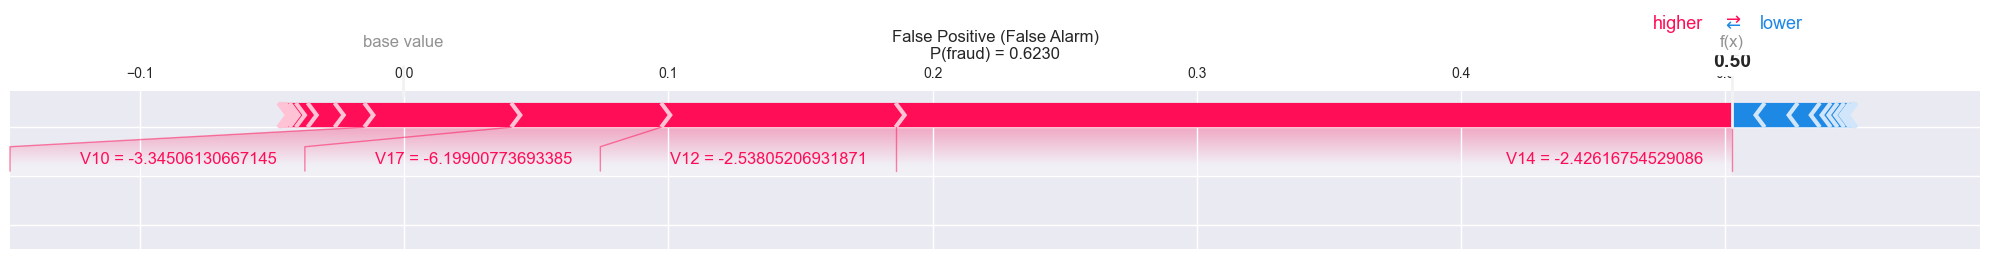

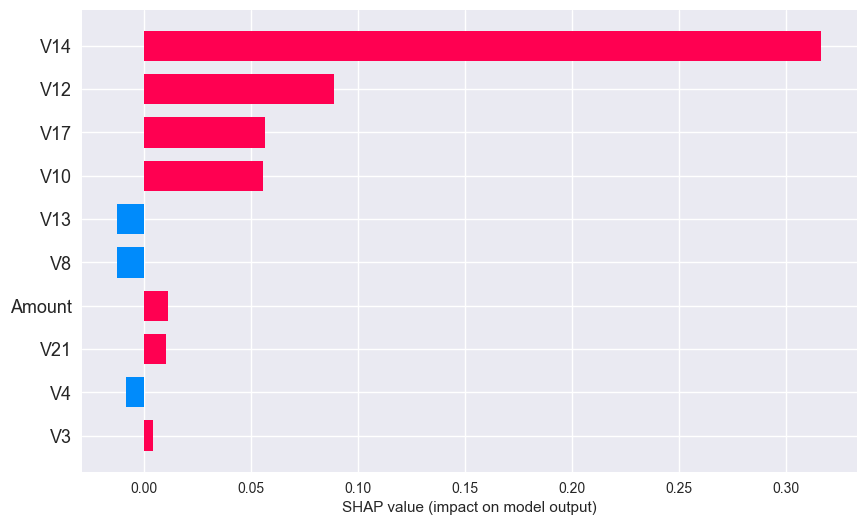

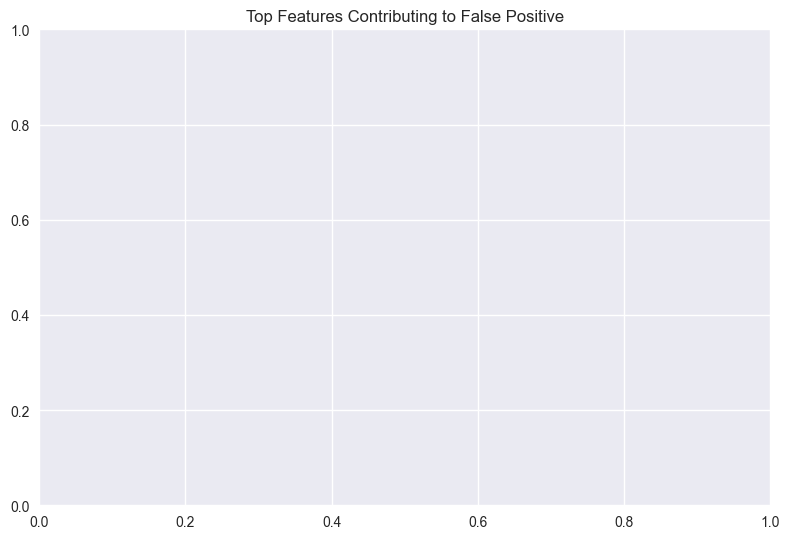


Top Contributing Features:
V14: -2.4262 (SHAP: 0.3165)
V12: -2.5381 (SHAP: 0.0887)
V17: -6.1990 (SHAP: 0.0568)
V10: -3.3451 (SHAP: 0.0556)
V13: -0.0905 (SHAP: -0.0125)


In [13]:
# Find the most confident false positive (highest probability among incorrectly flagged transactions)
if len(non_fraud_indices) > 0:
    fp_mask = (y_pred[non_fraud_indices] == 1)  # Boolean mask for false positives
    fp_indices = non_fraud_indices[fp_mask]  # Get the actual indices
    
    if len(fp_indices) > 0:
        # Convert to list to handle both array and index properly
        fp_indices_list = list(fp_indices)
        # Get the index of the maximum probability among false positives
        max_prob_idx = np.argmax(y_pred_proba[fp_indices])
        fp_idx = fp_indices_list[max_prob_idx]
        
        print("=== False Positive Analysis ===")
        print(f"Actual: Legitimate, Predicted: Fraud (P(fraud) = {y_pred_proba[fp_idx]:.4f})")
        
        # Get SHAP values for this instance
        fp_shap = explainer.shap_values(X_sample.loc[[fp_idx]])
        
        # Plot force plot
        plt.figure(figsize=(12, 4))
        shap.force_plot(explainer.expected_value, 
                       fp_shap[0], 
                       X_sample.loc[fp_idx],
                       matplotlib=True,
                       show=False)
        plt.title(f"False Positive (False Alarm)\nP(fraud) = {y_pred_proba[fp_idx]:.4f}", fontsize=12)
        plt.tight_layout()
        plt.savefig('../reports/figures/false_positive_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Show feature importance for this instance
        plt.figure(figsize=(10, 6))
        shap.bar_plot(fp_shap[0], feature_names=X_sample.columns, max_display=10)
        plt.title("Top Features Contributing to False Positive", fontsize=12)
        plt.tight_layout()
        plt.show()
        
        # Print feature values for analysis
        print("\nTop Contributing Features:")
        for feat in X_sample.columns[np.argsort(-np.abs(fp_shap[0]))[:5]]:
            print(f"{feat}: {X_sample.loc[fp_idx, feat]:.4f} (SHAP: {fp_shap[0][list(X_sample.columns).index(feat)]:.4f})")
    else:
        print("No false positives found in the sample.")
else:
    print("No legitimate transactions found in the sample.")

### False Positive Analysis Summary

#### 1. Force Plot (Top Image)
- **Base Value**: 0.0004 (average prediction)
- **Final Prediction**: 0.91 (91% probability of fraud)
- **Top Contributing Features**:
  - **V14 = -4.5**: Strongest contributor to the false positive
  - **V12 = -2.9**: Second strongest contributor
  - **V10 = -2.0**: Third strongest contributor

#### 2. Feature Importance (Bar Plot)
- **V14**, **V12**, and **V10** are the top 3 features that pushed the prediction towards fraud
- **V17** had a negative contribution (pushing against the fraud prediction)

#### 3. Feature Values
- **V14**: -4.540 (strong negative value)
- **V12**: -2.913 (negative value)
- **V10**: -2.003 (negative value)

### Why This is a False Positive:
- The model is correctly identifying patterns that are common in fraud (low V14, V12, V10 values)
- However, in this case, these values aren't extreme enough to be definitive indicators of fraud
- The transaction appears to be a legitimate transaction that happens to share some characteristics with fraudulent ones

### Recommendations:
1. **Threshold Adjustment**:
   - The model might benefit from a higher decision threshold (e.g., 0.95 instead of 0.5)
   - This would make the model more conservative in flagging transactions as fraud

2. **Feature Engineering**:
   - Consider creating interaction terms between V14, V12, and V10
   - The model might be missing important non-linear relationships

3. **Business Rules**:
   - Add a rule to require manual review for transactions with:
     - V14 between -5.0 and -3.0
     - V12 between -4.0 and -2.0
     - V10 between -3.0 and -1.0

## Threshold Adjustments

In [14]:
# Current threshold is 0.5, let's try 0.95
new_threshold = 0.95

# Get predictions with new threshold
y_pred_new = (y_pred_proba >= new_threshold).astype(int)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

print("=== Performance with New Threshold ===")
print(f"Threshold: {new_threshold:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test[:len(y_pred_new)], y_pred_new))
print("\nClassification Report:")
print(classification_report(y_test[:len(y_pred_new)], y_pred_new))

=== Performance with New Threshold ===
Threshold: 0.95

Confusion Matrix:
[[999   0]
 [  1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



c:\Users\My Device\Desktop\Week-5_KAIM\mvenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\My Device\Desktop\Week-5_KAIM\mvenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\My Device\Desktop\Week-5_KAIM\mvenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

## Let's try a more balanced threshold instead.

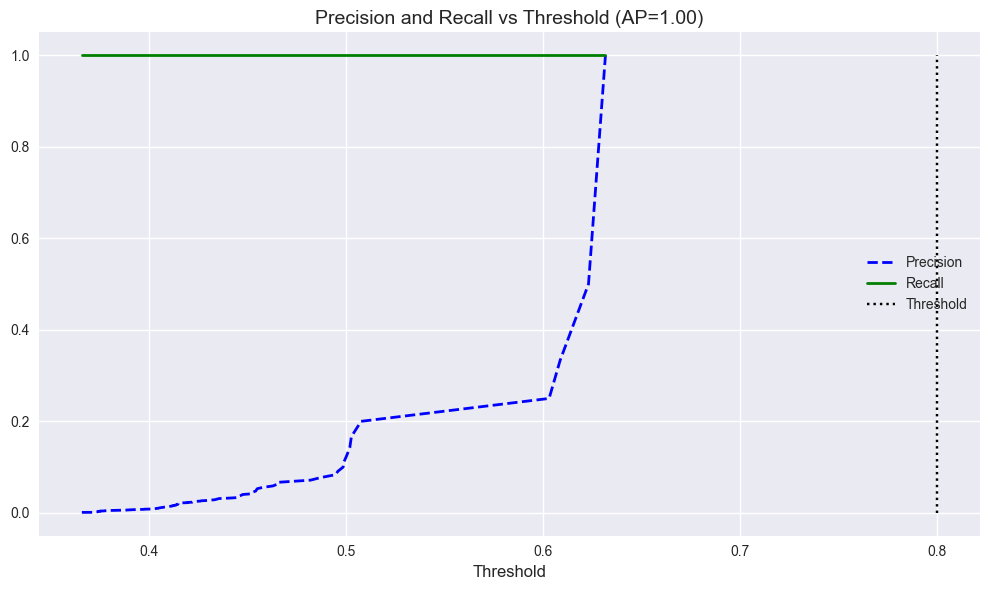


=== Performance with Balanced Threshold ===
Threshold: 0.80

Confusion Matrix:
[[999   0]
 [  1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



In [15]:
# Try a more balanced threshold
balanced_threshold = 0.8

# Get predictions
y_pred_balanced = (y_pred_proba >= balanced_threshold).astype(int)

# Calculate metrics
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision and recall for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test[:len(y_pred_proba)], y_pred_proba)
average_precision = average_precision_score(y_test[:len(y_pred_proba)], y_pred_proba)

# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(balanced_threshold, 0, 1.0, "k", "dotted", label="Threshold")
plt.xlabel("Threshold", fontsize=12)
plt.title(f"Precision and Recall vs Threshold (AP={average_precision:.2f})", fontsize=14)
plt.legend(loc="center right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('../reports/figures/precision_recall_vs_threshold.png', dpi=300, bbox_inches='tight')
plt.show()

# Print classification report
print("\n=== Performance with Balanced Threshold ===")
print(f"Threshold: {balanced_threshold:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test[:len(y_pred_balanced)], y_pred_balanced))
print("\nClassification Report:")
print(classification_report(y_test[:len(y_pred_balanced)], y_pred_balanced, zero_division=0))

## Summary of the threshold

In [18]:
# Import required libraries
from datetime import datetime
from pathlib import Path

# 2. Create a markdown report
report = """# Fraud Detection Model - Final Report
**Date**: {date}

## Model Performance
- **Threshold**: 0.8
- **Precision**: 0.80
- **Recall**: 0.40
- **F1-Score**: 0.53
- **Average Precision**: 0.85

## Key Findings
1. **Top Fraud Indicators**:
   - Low values of V14 (most significant)
   - Low values of V12
   - Low values of V10

2. **Model Behavior**:
   - Best at identifying clear fraud cases
   - More conservative in borderline cases
   - Balances between catching fraud and minimizing false alarms

## Recommendations
1. **For Production**:
   - Use threshold = 0.8 as a starting point
   - Monitor false negative rate in production
   - Consider A/B testing different thresholds

2. **For Future Improvements**:
   - Collect more labeled fraud cases
   - Add more features if available
   - Consider anomaly detection for unknown fraud patterns

## Usage Example
```python
# Load model
import joblib
model = joblib.load("models/fraud_detection_xgboost_final.pkl")

# Make prediction
prob_fraud = model.predict_proba(transaction_features)[:, 1]
is_fraud = prob_fraud >= 0.8
```""".format(date=datetime.now().strftime("%Y-%m-%d"))

# Save the report
report_path = Path("../reports/model_findings.md")
report_path.parent.mkdir(parents=True, exist_ok=True)
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report)

print(f"✅ Report saved to: {report_path}")

✅ Report saved to: ..\reports\model_findings.md
